In [4]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "bengaluru_accidents.csv"
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(df.head())

Dataset Overview:
         Date   Time                 Location Severity Weather     Month
0  2023-01-03  08:20      Silk Board Junction    Major   Clear   January
1  2023-01-10  22:45           Hebbal Flyover    Fatal    Rain   January
2  2023-02-01  07:50   Koramangala 80 Ft Road    Minor   Clear  February
3  2023-02-15  18:30        Madiwala Junction    Minor     Fog  February
4  2023-03-05  12:30  Electronic City Phase 1    Major   Clear     March


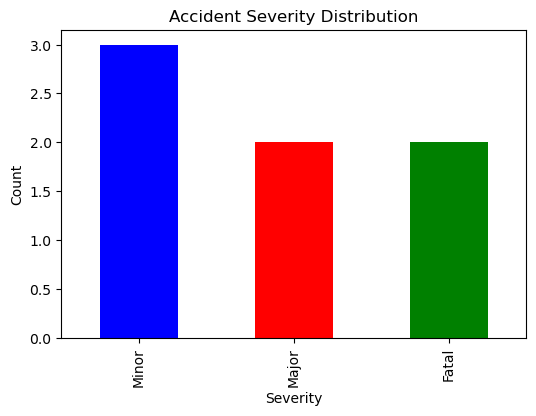

In [6]:
severity_counts = df["Severity"].value_counts()

plt.figure(figsize=(6, 4))
severity_counts.plot(kind="bar", color=["blue", "red", "green"])
plt.title("Accident Severity Distribution")
plt.xlabel("Severity")
plt.ylabel("Count")
plt.show()


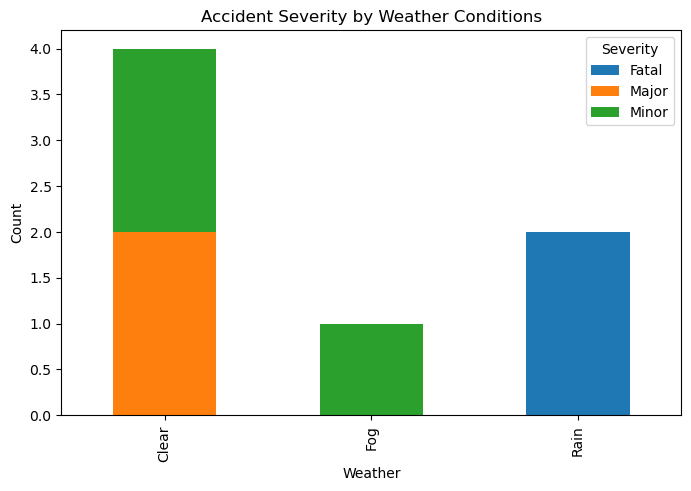

In [5]:

weather_severity = df.groupby("Weather")["Severity"].value_counts().unstack().fillna(0)

weather_severity.plot(kind="bar", stacked=True, figsize=(8, 5))
plt.title("Accident Severity by Weather Conditions")
plt.xlabel("Weather")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.show()

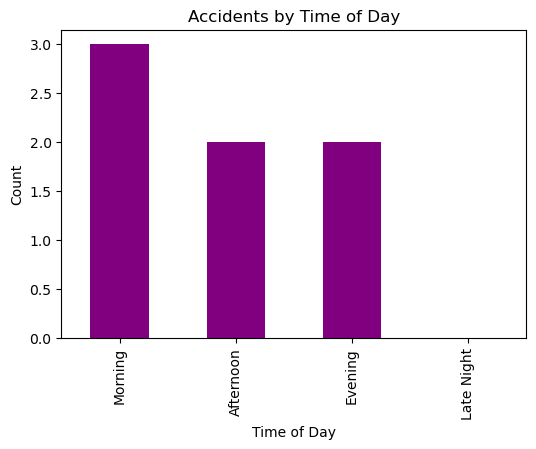

In [7]:

df["Hour"] = df["Time"].str.split(":").str[0].astype(int)
df["Time_of_Day"] = pd.cut(df["Hour"], bins=[0, 6, 12, 18, 24], labels=["Late Night", "Morning", "Afternoon", "Evening"])

plt.figure(figsize=(6, 4))
df["Time_of_Day"].value_counts().plot(kind="bar", color="purple")
plt.title("Accidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.show()



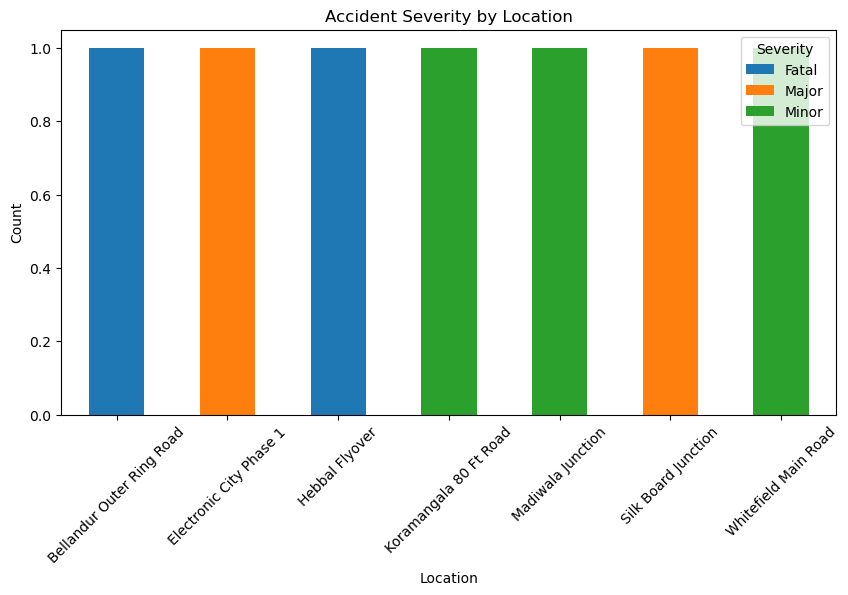

In [9]:
# Severity by location
location_severity = df.groupby("Location")["Severity"].value_counts().unstack().fillna(0)

# Plot location-wise severity
location_severity.plot(kind="bar", stacked=True, figsize=(10, 5))
plt.title("Accident Severity by Location")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Severity")
plt.xticks(rotation=45)
plt.show()

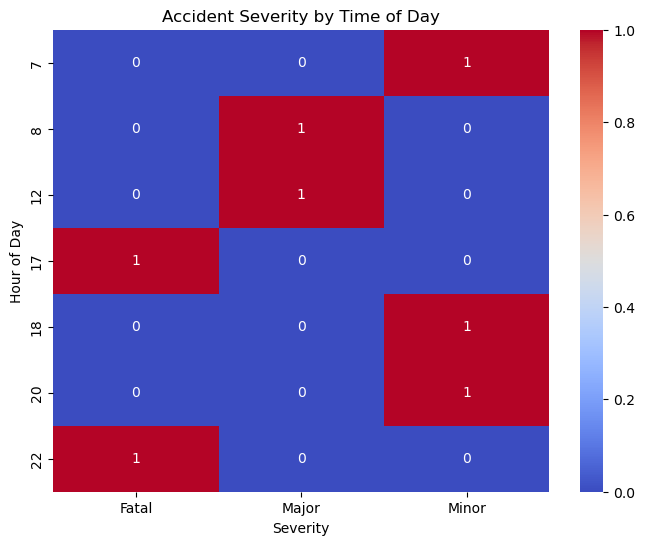

In [11]:

df["Hour"] = df["Time"].str.split(":").str[0].astype(int)
severity_map = df.pivot_table(index="Hour", columns="Severity", aggfunc="size", fill_value=0)

plt.figure(figsize=(8, 6))
sns.heatmap(severity_map, annot=True, cmap="coolwarm", fmt="d")
plt.title("Accident Severity by Time of Day")
plt.xlabel("Severity")
plt.ylabel("Hour of Day")
plt.show()